In [1]:
import json
import pandas as pd
from pathlib import Path

log_path = Path("data/trade_log.json")

if log_path.exists():
    with open(log_path, "r") as f:
        trades = json.load(f)
else:
    print("⚠️ No trade_log.json file found.")
    trades = []

# Load to DataFrame
df = pd.DataFrame(trades)
print(f"✅ Loaded {len(df)} trades")
df.head()

✅ Loaded 3 trades


,timestamp,ticker,strategy_name,description,entry_price,dte,target_pct,stop_pct,status
0,2025-04-18T22:03:08.413025,SPY,Diagonal Call Spread,"This strategy has high profit potential, align...",3.25,14,0.25,0.15,OPEN
1,2025-04-21T22:44:57.223335,SPY,Iron Condor,The Iron Condor strategy is ranked first due t...,3.25,14,0.25,0.15,OPEN
2,2025-04-21T22:59:16.189413,SPY,Covered Call,The Covered Call strategy ranks first due to i...,3.25,14,0.25,0.15,OPEN


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      3 non-null      object 
 1   ticker         3 non-null      object 
 2   strategy_name  3 non-null      object 
 3   description    3 non-null      object 
 4   entry_price    3 non-null      float64
 5   dte            3 non-null      int64  
 6   target_pct     3 non-null      float64
 7   stop_pct       3 non-null      float64
 8   status         3 non-null      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 344.0+ bytes


timestamp        0
ticker           0
strategy_name    0
description      0
entry_price      0
dte              0
target_pct       0
stop_pct         0
status           0
dtype: int64

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


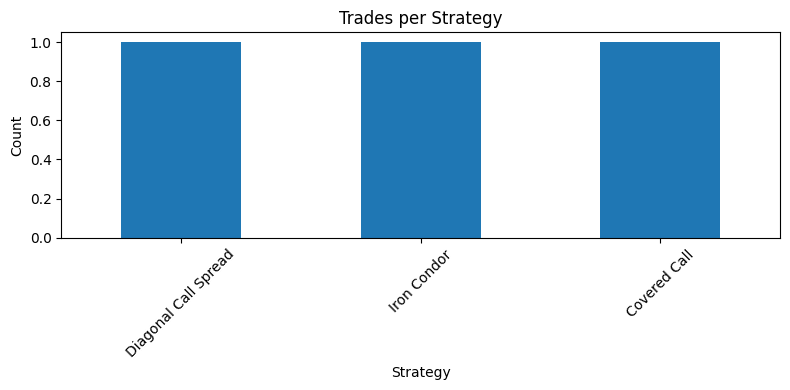

In [3]:
%pip install matplotlib
import matplotlib.pyplot as plt

df["strategy_name"].value_counts().plot(kind="bar", title="Trades per Strategy", figsize=(8, 4))
plt.xlabel("Strategy")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

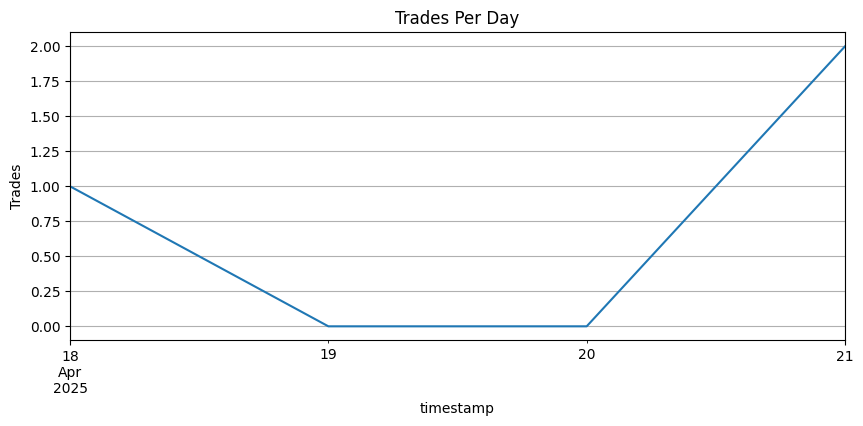

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp")["strategy_name"].resample("D").count().plot(figsize=(10, 4), title="Trades Per Day")
plt.ylabel("Trades")
plt.grid(True)
plt.show()


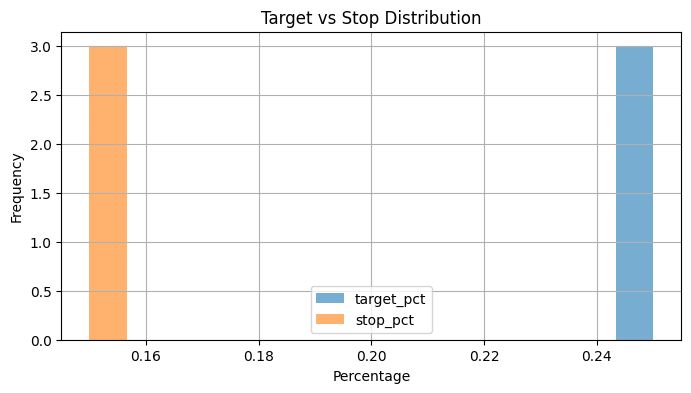

In [5]:
df[["target_pct", "stop_pct"]].plot.hist(bins=15, alpha=0.6, figsize=(8, 4))
plt.title("Target vs Stop Distribution")
plt.xlabel("Percentage")
plt.grid(True)
plt.show()

In [6]:
for name in df["strategy_name"].unique():
    desc = df[df["strategy_name"] == name]["description"].iloc[0]
    print(f"📘 {name}:\n{desc}\n{'-'*40}")

📘 Diagonal Call Spread:
This strategy has high profit potential, aligns well with the trader's understanding of time decay and use of options with different expiration dates, and is adaptable to a moderately bullish market.
----------------------------------------
📘 Iron Condor:
The Iron Condor strategy is ranked first due to its high profit potential and market adaptability. This strategy fits well with the trader's comfort with complex options strategies and their ability to improvise. It works best in low volatility markets, allowing the trader to profit from the asset price staying within a specific range.
----------------------------------------
📘 Covered Call:
The Covered Call strategy ranks first due to its ability to generate income and limit downside risk, which aligns with the trader's strengths. It also adapts well to a neutral or slightly bullish market, providing flexibility in various market conditions.
----------------------------------------
